In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("/media/workspace/DeepFood/deep-reco-gym/output/evaluation/EvaluateTestSetPredictions/results/TrivagoLogisticModelInteraction_selu____epsilon_greedy_58274b531d_9f5cc3cfcd/df_offpolicy.csv")
df.head()

,timestamp,timestamp_diff,step,user_idx,session_idx,sum_action_item_before,action_type_item_idx,action_type_idx,list_action_type_idx,list_reference_search_for_poi,...,water slide,wheelchair accessible,wifi (public areas),wifi (rooms),star,list_metadata,item_idx_action,rewards,rhat_rewards,ps_eval
0,1541461727,1541461708,2.0,3674,3219,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,0,1,1,1,5,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, ...",809,0.0,0.007804,0.004
1,1541461746,3082923435,3.0,3674,3219,1.0,798,2,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,0,1,1,1,5,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, ...",809,0.0,0.001263,0.004
2,1541461746,3082923435,3.0,3674,3219,1.0,798,2,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,0,1,1,1,5,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, ...",809,0.0,0.001377,0.004
3,1541461746,3082923435,3.0,3674,3219,1.0,798,2,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,0,1,1,1,5,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, ...",809,0.0,0.008014,0.004
4,1541461746,3082923435,3.0,3674,3219,1.0,798,2,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,0,1,1,1,5,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, ...",809,0.0,0.003151,0.004


In [50]:
df.iloc[10].prob_actions

'[0.904, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004]'

In [51]:
import numpy as np, scipy.stats as st

a = df.rhat_rewards

st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(0.033223639698000386, 0.03532803679772114)

In [52]:
array1 = np.array([np.nan, 1, 2])
array2 = array1[~np.isnan(array1)]

print(array2)

[1. 2.]


In [53]:
np.mean(a)

0.03427583824786076

In [54]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h
mean_confidence_interval(a)

(0.03427583824786076, 0.033223639698000386, 0.03532803679772114)

/home/marlesson/anaconda3/envs/deep-reco-gym/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


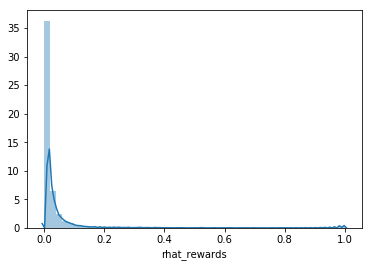

In [55]:
sns.distplot(df.rhat_rewards)

/home/marlesson/anaconda3/envs/deep-reco-gym/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


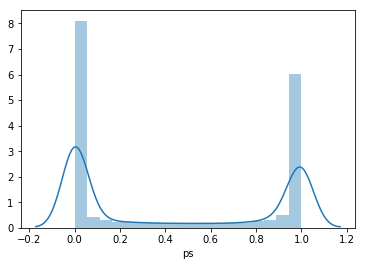

In [65]:
sns.distplot(df.ps)

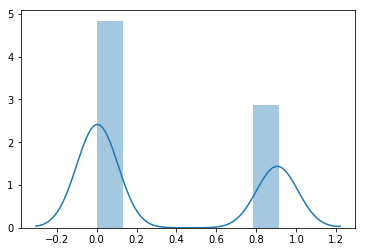

In [60]:
sns.distplot(df[df.rewards == 1].ps_eval.values)

In [77]:
df[['ps', 'ps_eval']][df.ps >= 0 + e].sort_values('ps')

,ps,ps_eval
43859,0.010004,0.004
10743,0.010026,0.004
23736,0.010027,0.004
16066,0.010052,0.004
38748,0.010057,0.004
...,...,...
25656,1.000000,0.004
12757,1.000000,0.004
36734,1.000000,0.004
12227,1.000000,0.004


In [75]:
e = 0.01
df[df.ps >= 0 + e].shape

(26352, 207)

/home/marlesson/anaconda3/envs/deep-reco-gym/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


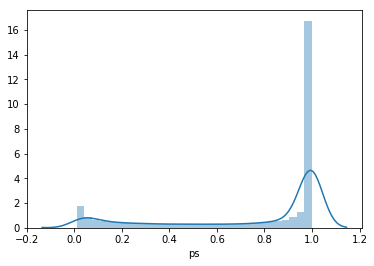

In [76]:
sns.distplot(df[df.ps > 0 + e].ps)

In [8]:
df.iloc[0].item_idx

238